Unnamed: 0           int64
method              object
ranks testMSE      float64
ranks succRate     float64
means succRate     float64
ranks satRatio     float64
means satRatio     float64
method category     object
dtype: object
    Unnamed: 0                        method  ranks testMSE  ranks succRate  \
0            0                      AdaBoost      15.229167       13.375000   
1            1              GradientBoosting      13.500000       13.375000   
2            2                   KernelRidge       9.437500       16.645833   
3            3                     LassoLars      20.979167       13.458333   
4            4                        Linear      20.791667       16.541667   
5            5                     LinearSVR      20.291667       16.541667   
6            6                           MLP       9.854167       14.958333   
7            7                  RandomForest      14.625000       13.375000   
8            8                           SGD      21.000000

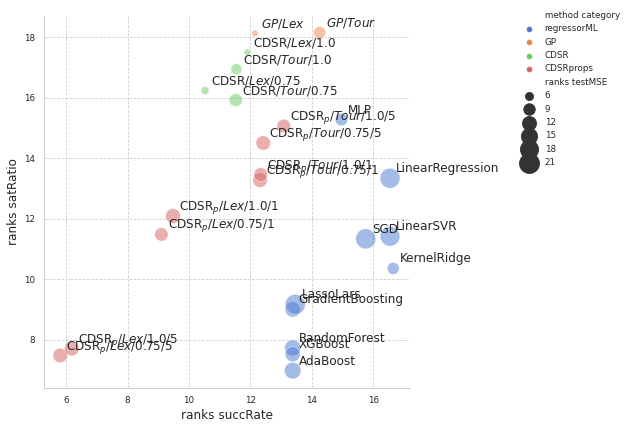

In [47]:
import re
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# sns.set_theme("whitegrid")
# sns.set_style('whitegrid', {'legend.frameon':True})
sns.set_context("paper", rc={"font.size":12,"axes.titlesize":11,"axes.labelsize":12})  
sns.set_style("whitegrid", {'grid.linestyle': '--', 'legend.frameon':True, 'legend.facecolor':"white"})  #, font_scale=1.07
# sns.set(font_scale=1.07)
plt.rcParams['text.usetex'] = False
# plt.rcParams["legend.facecolor"] = "white"

def convertLabel(x):
    x = x.replace(r"\cdsrProps noVer", r"GP$_{p}$")
    x = x.replace(r"\cdsrProps", r"CDSR$_{p}$")
    x = re.sub(r"_([a-zA-Z0-9$])", r"/\1", x)
#     x = x.replace("_", "")
    conversion_table = {"Linear":"LinearRegression"}
    if x in conversion_table:
        return conversion_table[x]
    else:
        return x

def cleanDataFrame(df):
    d = {"ranks_succRate": "ranks succRate",
         "means_succRate": "means succRate",
         "means_satRatio": "means satRatio",
         "ranks_satRatio": "ranks satRatio",
         "ranks_testMSE": "ranks testMSE",
         "method_category": "method category"}
    df = df.rename(d, axis=1)
    df = df.loc[(df['method category'] != "CDSRprops noVer") &
                (df['method'] != r"\gpProps_$Tour$_$1$") &
                (df['method'] != r"\gpProps_$Tour$_$5$") &
                (df['method'] != r"\gpProps_$Lex$_$1$") &
                (df['method'] != r"\gpProps_$Lex$_$5$")]
    df = df.reset_index(drop=True)
    print(df.dtypes)
    print(df)
    return df

# Load the example mpg dataset
# mpg = sns.load_dataset("mpg")
tevc_data = cleanDataFrame(pd.read_csv('methods_summary.csv', sep=";"))
methods = tevc_data["method"]
xs = tevc_data["ranks succRate"]
ys = tevc_data["ranks satRatio"]

g = sns.relplot(x="ranks succRate", y="ranks satRatio", hue="method category", size="ranks testMSE",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=tevc_data)

sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))

for i, label in enumerate (methods):
    print(i, convertLabel(label))
    plt.text(xs[i]+0.2, ys[i]+0.2, convertLabel(label))
plt.show()

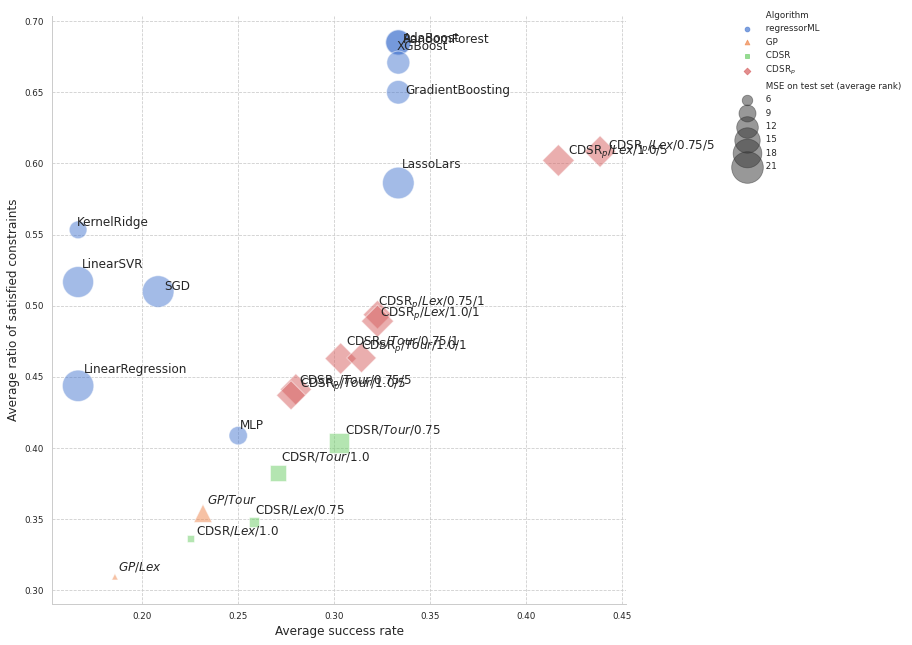

In [48]:
def fixLegendNaming_1(g):  # g is a plot object returned by seaborn plotting functions
    d = {"method category": "Algorithm",
         "ranks testMSE": "MSE on test set (average rank)",
         "means satRatio": "Average ratio of satisfied\nconstraints",
         "CDSRprops noVer": r"GP$_{p}$",
         "CDSRprops": r"CDSR$_{p}$"
        }
    for t in g._legend.texts:
        text = t.get_text()
        if text in d:
            t.set_text(" "+d[text])
        else:
            t.set_text(" "+text)
#         elif re.match("[0-9]+[.0-9]*", text):
#             t.set_text(text)
    for i,lh in enumerate(g._legend.legendHandles):
        if i > 4:
            lh.set_alpha(0.5)
            #lh._sizes = [x/1.0 for x in lh._sizes]
        else:
            lh.set_alpha(0.7)
        # You can also use lh.set_sizes([50])

def addPointLabels_1(xs, ys, methods2):
    for i, label in enumerate (methods2):
#         print(convertLabel(label))
        plt.text(xs[i]*1.007*random.uniform(0.99, 1.01), (ys[i]+0.005)*random.uniform(0.99, 1.01), convertLabel(label))

# plt.clf()
# plt.rcParams['text.usetex'] = True

xs = tevc_data["means succRate"]
ys = tevc_data["means satRatio"]
g = sns.relplot(x="means succRate", y="means satRatio", hue="method category", style="method category",
                size="ranks testMSE", sizes=(40, 1000), alpha=.5, palette="muted",
                height=9, markers=["o", "^", "s", "D"], data=tevc_data)
g.set(xlabel="Average success rate", ylabel="Average ratio of satisfied constraints")
fixLegendNaming_1(g)
addPointLabels_1(xs, ys, methods)

# Put the legend out of the figure
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))

plt.savefig('tevc_methods_summary.pdf', bbox_inches='tight')
plt.show()

processing: AdaBoost
processing: GradientBoosting
processing: KernelRidge
processing: LassoLars
processing: Linear
processing: LinearSVR
processing: MLP
processing: RandomForest
processing: SGD
processing: XGBoost
processing: $GP$_$Tour$
processing: $GP$_$Lex$
processing: CDSR_$Tour$_$0.75$
processing: CDSR_$Tour$_$1.0$
processing: CDSR_$Lex$_$0.75$
processing: CDSR_$Lex$_$1.0$
processing: \cdsrProps_$Tour$_$0.75$_$1$
processing: \cdsrProps_$Tour$_$0.75$_$5$
processing: \cdsrProps_$Tour$_$1.0$_$1$
processing: \cdsrProps_$Tour$_$1.0$_$5$
processing: \cdsrProps_$Lex$_$0.75$_$1$
processing: \cdsrProps_$Lex$_$0.75$_$5$
processing: \cdsrProps_$Lex$_$1.0$_$1$
processing: \cdsrProps_$Lex$_$1.0$_$5$


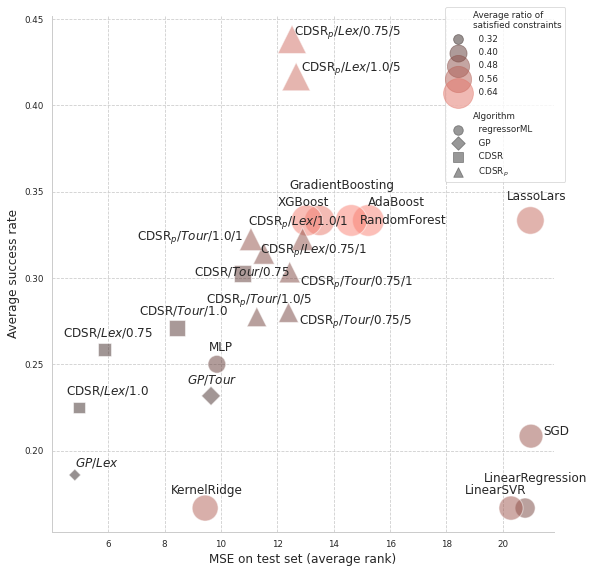

In [51]:
def fixLegendNaming_2(g):  # g is a plot object returned by seaborn plotting functions
    d = {"method category": "\nAlgorithm",
         "ranks testMSE": "MSE on test set (average rank)",
         "means satRatio": "Average ratio of\nsatisfied constraints",
         "CDSRprops noVer": r"GP$_{p}$",
         "CDSRprops": r"CDSR$_{p}$"
        }
    for i,t in enumerate(g._legend.texts):
        text = t.get_text()
        if text in d:
            if i not in {0,6}:
                t.set_text("  " + d[text])
            else:
                t.set_text(d[text])
        elif i not in {0,6}:
            t.set_text("  " + text)
#         elif re.match("[0-9]+[.0-9]*", text):
#             t.set_text(text)
    for i,lh in enumerate(g._legend.legendHandles):
        lh.set_alpha(0.5)
        if i > 6:
            lh._sizes = [4*x for x in lh._sizes]
        # You can also use lh.set_sizes([50])

def addPointLabels_2(xs, ys, methods2):
    for i, label in enumerate (methods2):
#         print(convertLabel(label))
        print("processing:", label)
        if "XGBoost" in label:
            plt.text(xs[i]*0.92, (ys[i]+0.005)*1.01, convertLabel(label))
        elif "RandomForest" in label:
            plt.text(xs[i]*1.02, (ys[i]+0.005)*0.98, convertLabel(label))
        elif "AdaBoost" in label:
            plt.text(xs[i], (ys[i]+0.005)*1.01, convertLabel(label))
        elif "GradientBoosting" in label:
            plt.text(xs[i]*0.92, (ys[i]+0.005)*1.04, convertLabel(label))
        elif "LinearSVR" in label:
            plt.text(xs[i]*0.92, (ys[i]+0.005)*1.02, convertLabel(label))
        elif "Linear" in label:
            plt.text(xs[i]*0.93, (ys[i]+0.005)*1.06, convertLabel(label))
        elif "SGD" in label:
            plt.text(xs[i]*1.02, (ys[i]+0.005)*0.98, convertLabel(label))
        elif "LassoLars" in label:
            plt.text(xs[i]*0.96, (ys[i]+0.005)*1.02, convertLabel(label))
        elif "KernelRidge" in label:
            plt.text(xs[i]*0.87, (ys[i]+0.005)*1.02, convertLabel(label))
        elif "MLP" in label:
            plt.text(xs[i]*0.97, (ys[i]+0.005)*1.01, convertLabel(label))
        elif r"\cdsrProps_$Lex$_$1.0$_$1$" in label:
            plt.text(xs[i]*0.85, (ys[i]+0.005)*1.01, convertLabel(label))
        elif r"\cdsrProps_$Lex$_$0.75$_$1$" in label:
            plt.text(xs[i]*1.03, (ys[i]+0.005)*0.96, convertLabel(label))
        elif r"$GP$_$Tour$" in label:
            plt.text(xs[i]*0.91, (ys[i]+0.005)*1.01, convertLabel(label))
        elif r"\cdsrProps_$Tour$_$1.0$_$5$" in label:
            plt.text(xs[i]*0.84, (ys[i]+0.005)*1.01, convertLabel(label))
        elif r"\cdsrProps_$Tour$_$0.75$_$1$" in label:
            plt.text(xs[i]*1.03, (ys[i]+0.005)*0.96, convertLabel(label))
        elif r"\cdsrProps_$Tour$_$0.75$_$5$" in label:
            plt.text(xs[i]*1.03, (ys[i]+0.005)*0.96, convertLabel(label))
        elif r"\cdsrProps_$Tour$_$1.0$_$1$" in label:
            plt.text(xs[i]*0.61, (ys[i]+0.005)*1.01, convertLabel(label))
        elif r"CDSR_$Lex$_$0.75$" in label:
            plt.text(xs[i]*0.75, (ys[i]+0.005)*1.01, convertLabel(label))
        elif r"CDSR_$Tour$_$1.0$" in label:
            plt.text(xs[i]*0.84, (ys[i]+0.005)*1.01, convertLabel(label))
        elif r"CDSR_$Tour$_$0.75$" in label:
            plt.text(xs[i]*0.84, (ys[i]+0.005)*0.98, convertLabel(label))
        elif r"CDSR_$Lex$_$1.0$" in label:
            plt.text(xs[i]*0.91, (ys[i]+0.005)*1.01, convertLabel(label))
        else:
            plt.text(xs[i]*1.007*random.uniform(0.99, 1.01), (ys[i]+0.005)*random.uniform(0.99, 1.01), convertLabel(label))

        
palette = sns.color_palette("dark:salmon", as_cmap=True)  #sns.color_palette("Spectral", as_cmap=True),  #palette="muted"
# palette = "muted"
ys = tevc_data["means succRate"]
xs = tevc_data["ranks testMSE"]
tevc_data['means satRatio'] = pd.to_numeric(tevc_data['means satRatio'])
g = sns.relplot(y="means succRate", x="ranks testMSE",
                hue="means satRatio", style="method category", size="means satRatio",
                sizes=(70, 1000), alpha=.5, palette=palette, 
                height=8, data=tevc_data,
                markers=["o", "D", "s", "^"])  #aspect=11.7/8.27
# OK palety:
# sns.color_palette("dark:salmon", as_cmap=True),
# sns.color_palette("ch:s=-.2,r=.6", as_cmap=True)
#Blues
#Spectral_r
g.set(ylabel ="Average success rate", xlabel = "MSE on test set (average rank)")
fixLegendNaming_2(g)
# legend = plt.legend()
# frame = legend.get_frame()
# frame.set_facecolor('white')
# frame.set_edgecolor('b')

addPointLabels_2(xs, ys, methods)
# Put the legend out of the figure
sns.move_legend(g, "upper right", bbox_to_anchor=(0.87, 1))  #, bbox_to_anchor=(1, 1))  #upper left
# legend = plt.legend(frameon=True, borderpad=2.5)
# print(dir(g._legend))
g._legend.set_frame_on(True)
lframe = g._legend.get_frame()
lframe.set_width(10)
# print(dir(lframe))
plt.savefig('tevc_methods_summary2.pdf', bbox_inches='tight')